# Câu 1

In [71]:
import numpy as np

In [72]:
def kiem_tra_so_hoan_hao(n: int) -> bool:
    if n < 2:
        return False
    s = 1
    i = 2
    while i * i <= n:
        if n % i == 0:
            s += i
            j = n // i
            if j != i:
                s += j
        i += 1
    return s == n

In [73]:
np.random.seed(5)
A = np.random.randint(1, 501, size=(6,6))

row_sums = A.sum(axis=1)
col_sums = A.sum(axis=0)
row_idx_max = int(np.argmax(row_sums))
col_idx_max = int(np.argmax(col_sums))

perfects = np.array([v for v in np.unique(A) if kiem_tra_so_hoan_hao(int(v))], dtype=int)

B = A.copy()
if perfects.size > 0:
    min_perfect = perfects.min()
    B[row_idx_max, :] = min_perfect
    B[:, col_idx_max] = min_perfect

print("Danh sách các phần tử được phát sinh ngẫu nhiên trong mảng A:")
print(A)
print(f"Index dòng có tổng lớn nhất : {row_idx_max}")
print(f"Index cột có tổng lớn nhất : {col_idx_max}")
print(f"Các phần tử là số hoàn hảo trong A: {perfects}")
print("Mảng sau khi thay thế :")
print(B)

Danh sách các phần tử được phát sinh ngẫu nhiên trong mảng A:
[[356 207 496 190 487 119]
 [401  74   9 229 232 447]
 [412 113 159 209   8 205]
 [400 114 438 488  81  28]
 [ 45 206 204  66 432  31]
 [469  87 126 147 255 378]]
Index dòng có tổng lớn nhất : 0
Index cột có tổng lớn nhất : 0
Các phần tử là số hoàn hảo trong A: [ 28 496]
Mảng sau khi thay thế :
[[ 28  28  28  28  28  28]
 [ 28  74   9 229 232 447]
 [ 28 113 159 209   8 205]
 [ 28 114 438 488  81  28]
 [ 28 206 204  66 432  31]
 [ 28  87 126 147 255 378]]


# Câu 2

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [75]:
df = pd.read_csv("transactions.csv")
df.head()
df.tail()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    5000 non-null   object 
 1   customer_id       5000 non-null   object 
 2   product           5000 non-null   object 
 3   category          5000 non-null   object 
 4   quantity          5000 non-null   int64  
 5   price             5000 non-null   float64
 6   discount          5000 non-null   float64
 7   transaction_date  5000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 312.6+ KB


,transaction_id,customer_id,product,category,quantity,price,discount,transaction_date
count,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000
unique,5000,1183,250,8,NaN,NaN,NaN,1872
top,T100000,C1935,Product_141,Clothing,NaN,NaN,NaN,2022-01-17
freq,1,12,32,899,NaN,NaN,NaN,9
mean,NaN,NaN,NaN,NaN,2.988000,248.353342,0.067400,NaN
std,NaN,NaN,NaN,NaN,1.421921,144.315783,0.087514,NaN
min,NaN,NaN,NaN,NaN,1.000000,7.360000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2.000000,119.320000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,3.000000,241.970000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,4.000000,384.110000,0.100000,NaN


In [76]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

In [77]:
df['month_num'] = df['transaction_date'].dt.month
df['month'] = df['transaction_date'].dt.strftime('%B')
df['final_amount'] = df['quantity'] * df['price'] * (1 - df['discount'])

In [78]:
customer_total = df.groupby('customer_id')['final_amount'].sum()
top_customer = customer_total.idxmax()
top_customer_total = customer_total.max()

fav_product = (
    df[df['customer_id'] == top_customer]
    .groupby('product')['quantity']
    .sum()
    .idxmax()
)

print("Top customer:", top_customer)
print("Total:", top_customer_total)
print("Favorite product of top customer:", fav_product)

Top customer: C1011
Total: 10878.0825
Favorite product of top customer: Product_109


In [79]:
prod_rev = df.groupby(['category','product'])['final_amount'].sum().reset_index()
best_prod = (
    prod_rev.sort_values(['category','final_amount'], ascending=[True,False])
    .groupby('category')
    .head(1)    
)

print("Sản phẩm có doanh thu cao nhất trong mỗi category:")
best_prod

Sản phẩm có doanh thu cao nhất trong mỗi category:


,category,product,final_amount
23,Automotive,Product_216,30990.0085
45,Beauty,Product_177,31016.3980
84,Clothing,Product_189,41729.6295
120,Electronics,Product_225,27165.1300
146,Grocery,Product_184,33126.8060
161,Home,Product_029,36818.8550
213,Sports,Product_116,43317.1500
231,Toys,Product_083,24350.2380


In [80]:
spend = customer_total.reset_index().rename(columns={'final_amount':'total_spend'})
Q1, Q3 = spend['total_spend'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
outliers = spend[spend['total_spend'] > upper].sort_values('total_spend', ascending=False).head(3)
outliers

,customer_id,total_spend
11,C1011,10878.0825
576,C1587,9756.5140
1047,C2062,9654.3535


In [81]:
monthly = df.groupby('month_num').agg(
    average_revenue=('final_amount', 'mean'),
    order_count=('transaction_id', 'count')
).reset_index()

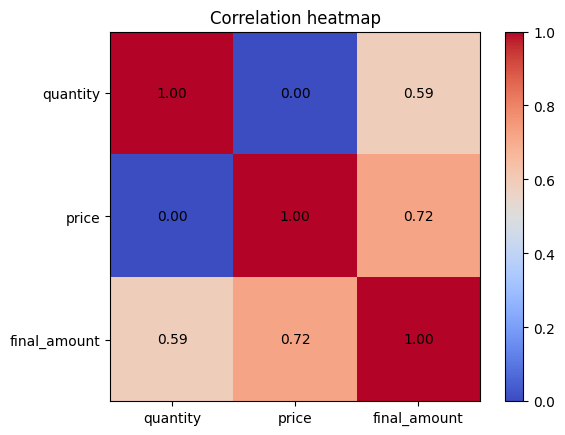

In [82]:
corr = df[['quantity','price','final_amount']].corr()
plt.imshow(corr, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
for (i,j), val in np.ndenumerate(corr.values):
    plt.text(j,i,f"{val:.2f}",ha='center',va='center')
plt.title("Correlation heatmap")
plt.show()

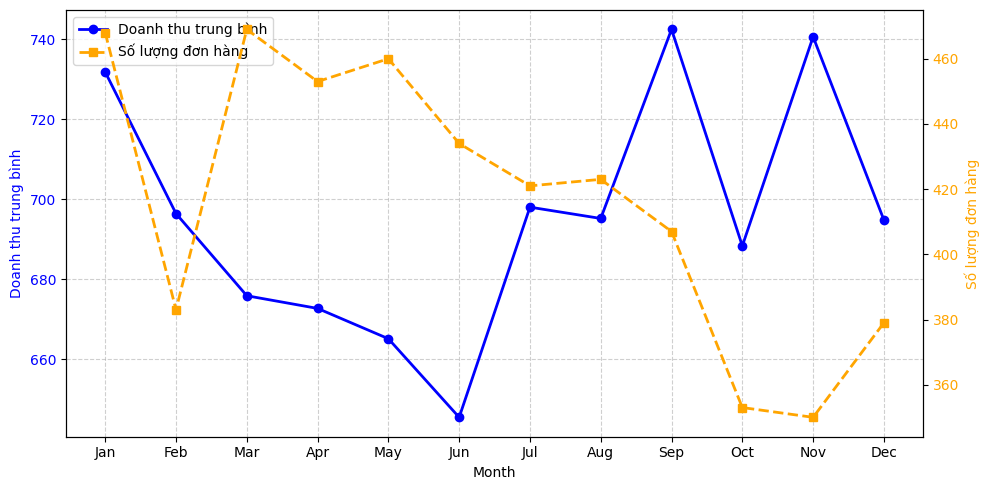

In [83]:
fig, ax1 = plt.subplots(figsize=(10,5))

ln1 = ax1.plot(monthly['month_num'], monthly['average_revenue'],
               color='blue', marker='o', linewidth=2, label='Doanh thu trung bình')
ax1.set_xlabel('Month')
ax1.set_ylabel('Doanh thu trung bình', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(monthly['month_num'])
ax1.set_xticklabels([calendar.month_abbr[m] for m in monthly['month_num']])
ax1.grid(True, linestyle='--', alpha=0.6)   

ax2 = ax1.twinx()
ln2 = ax2.plot(monthly['month_num'], monthly['order_count'],
               color='orange', marker='s', linestyle='--', linewidth=2, label='Số lượng đơn hàng')
ax2.set_ylabel('Số lượng đơn hàng', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
fig.tight_layout()
plt.show()

In [84]:
# Một số tháng có nhiều đơn hàng nhưng giá trị đơn thấp → khách mua nhiều sản phẩm giá rẻ.

# Tháng có doanh thu trung bình cao thường lại ít đơn hàng → tập trung vào các đơn giá trị lớn.

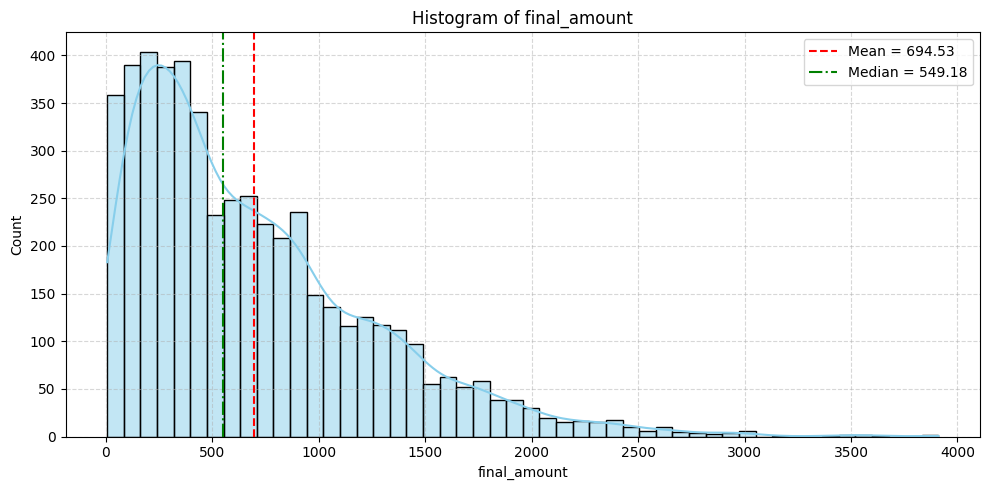

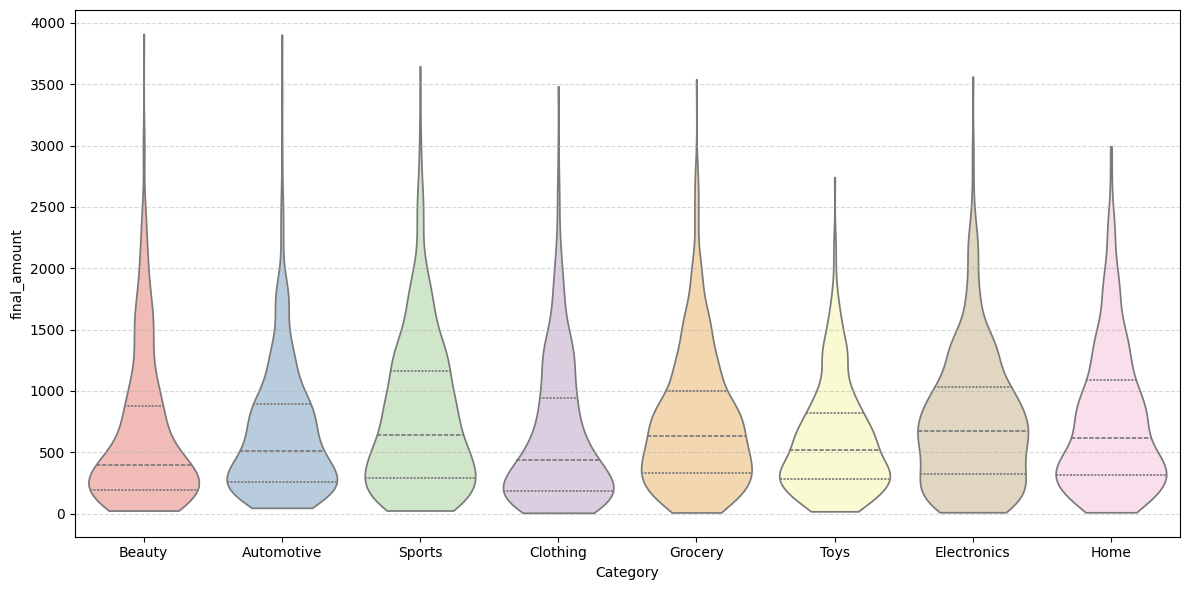

In [85]:
vals = df['final_amount'].dropna()

plt.figure(figsize=(10,5))
sns.histplot(vals, bins=50, kde=True, color='skyblue', edgecolor='black')
mean = vals.mean()
median = vals.median()
plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f'Median = {median:.2f}')

plt.title('Histogram of final_amount')
plt.xlabel('final_amount')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
sns.violinplot(
    data=df, 
    x='category', 
    y='final_amount',
    hue='category',        
    legend=False,           
    inner='quartile',       
    density_norm='width',    
    cut=0,                  
    palette='Pastel1'        
)

plt.xlabel('Category')
plt.ylabel('final_amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [86]:
# Histogram
# Phân phối giá trị đơn hàng lệch phải.

# Đa số đơn hàng có giá trị thấp đến trung bình, trong khi một số ít đơn hàng giá trị rất lớn kéo trung bình lên.

# Violin
# Một số category có phân phối hẹp, median cao → giá trị đơn hàng ổn định.

# Một số category khác phân phối rộng, nhiều outlier → sự khác biệt lớn giữa các đơn hàng.

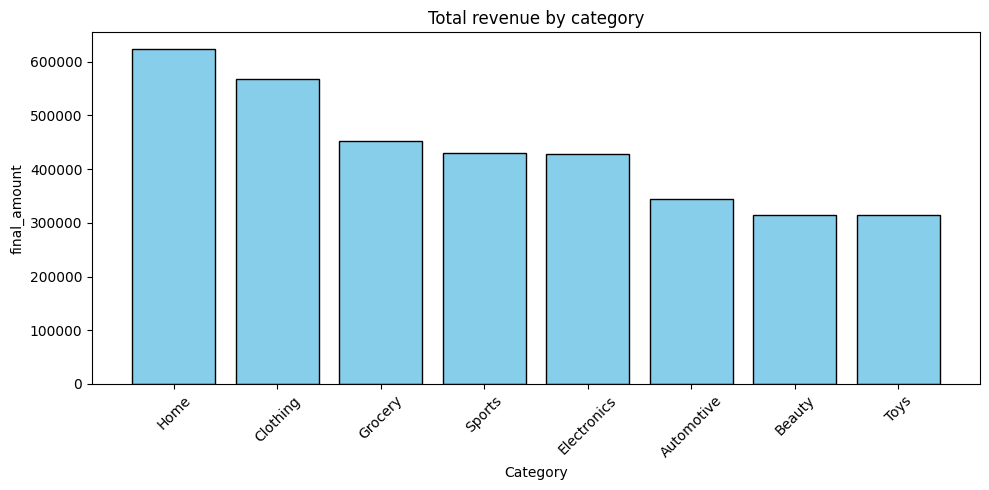

In [87]:
cat_rev = df.groupby('category')['final_amount'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(cat_rev.index.astype(str), cat_rev.values, color='skyblue', edgecolor='black')

ax.set_xlabel("Category")
ax.set_ylabel("final_amount")
ax.set_title("Total revenue by category")

# Gọi plt.xticks để set nhãn + rotation (an toàn, không warning)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [88]:
# Doanh thu tập trung nhiều nhất vào 1–2 category lớn.

# Các category nhỏ có doanh thu chênh lệch rõ rệt → đóng góp ít cho tổng doanh thu.

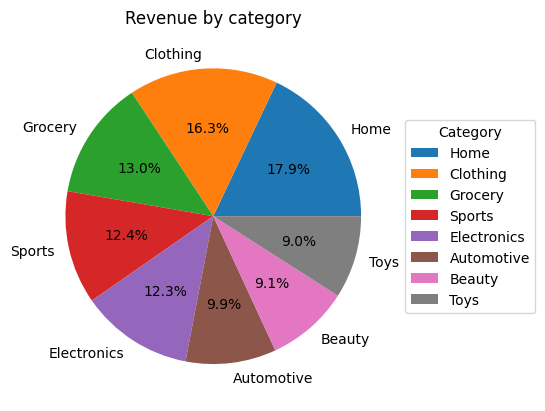

In [89]:
cat_rev = df.groupby('category')['final_amount'].sum().sort_values(ascending=False)

cat_rev.plot(kind='pie', autopct='%1.1f%%')

plt.ylabel("")
plt.title("Revenue by category")

plt.legend(title="Category", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [90]:
# Tỷ trọng doanh thu không đều, một vài category chiếm phần lớn, còn lại chỉ chiếm tỉ lệ nhỏ.

# Câu 3

In [91]:
import plotly.express as px
import plotly.io as pio
import pycountry

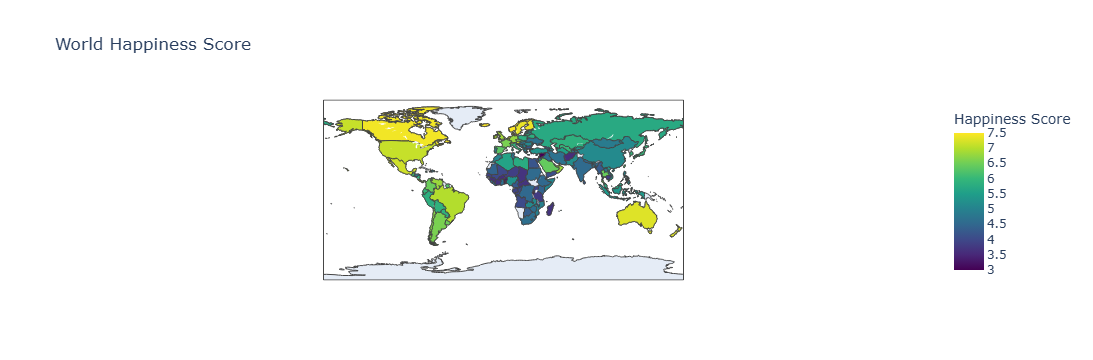

In [92]:
df = pd.read_csv("world_happiness.csv")
df[['Country', 'Region', 'Happiness Score']] = df['Data'].str.split('_', n=2, expand=True)
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')

country_fix = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "North Cyprus": "Cyprus",
    "Turkey": "Türkiye",  
    "Somaliland region": "Somalia", 
    "Macedonia": "North Macedonia",
    "Swaziland": "Eswatini",
    "Palestinian Territories": "Palestine, State of",
    "Congo (Kinshasa)": "Congo, The Democratic Republic of the",
    "Congo (Brazzaville)": "Congo",
    "Ivory Coast": "Côte d'Ivoire",
}

def get_iso3(country_name):
    if country_name in country_fix:
        country_name = country_fix[country_name]
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

df['iso_alpha'] = df['Country'].apply(get_iso3)
fig = px.choropleth(
    df,
    locations='iso_alpha',
    color='Happiness Score',
    hover_name='Country',
    color_continuous_scale='Viridis',
    range_color=[3, 7.5],
    title="World Happiness Score"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Happiness Score",
        tick0=3,
        dtick=0.5
    )
)

fig.show()